## Metadata

- **Dataset Name**: Diabetes prediction dataset, Source: Kaggle
- **Dataset size**: 100000 rows & 9 columns
- **Dataset Description**: The diabetes_prediction_dataset contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.
- **Column Information**:

| **Column**            | **Description**                                                                 | **Data type** |
|-----------------------|---------------------------------------------------------------------------------|---------------|
| `gender`              | patient gender                                                                  | String        |
| `age`                 | patient age in year                                                             | Integer       |
| `hypertension`        | patient hyperternsion history (`1` for yes, `0` for never)                      | Integer       |
| `heart_disease`       | patient heart disease history (`1` for yes, `0` for never)                      | Integer       |
| `smoking_history`     | patient smoking history (category like `never smoked`, `formerly smoked`)       | String        |
| `bmi`                 | patient body mass index                                                         | Float         |
| `HbA1c_level`         | measure of a patient average blood sugar level over the past 2-3 months         | Float         |
| `blood_glucose_level` | amount of glucose in the bloodstream at a given time                            | Integer       |
| `diabetes`            | target variable being predicted (`1` for diabetes, `0` for non diabetes)        | Integer       |


## Import Dataset & Necessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_raw = pd.read_csv("diabetes_prediction_dataset.csv")
df_raw

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Exploratory Data Analysis

### Check data types dan missing values

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df_raw.describe(exclude='object')

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df_raw.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [6]:
# df_raw.select_dtypes(include='object').columns
df_raw.select_dtypes(exclude='object').columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
# specify the numerical and categorical column

numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_cols = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['gender', 'smoking_history', 'hypertension', 'heart_disease']
Numerical columns: ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [8]:
# check null value
df_raw.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# check duplicate value
df_raw.duplicated().sum()

3854

In [10]:
# remove duplicate valuue
df_raw2 = df_raw.drop_duplicates().reset_index(drop=True)
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.6+ MB


### Check data distribution & outliers

age


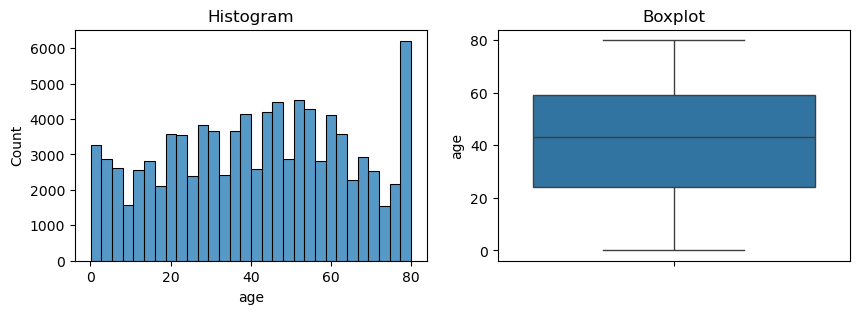

Skewness: -0.062444736060842554
Kurtosis: -1.004415677016537
bmi


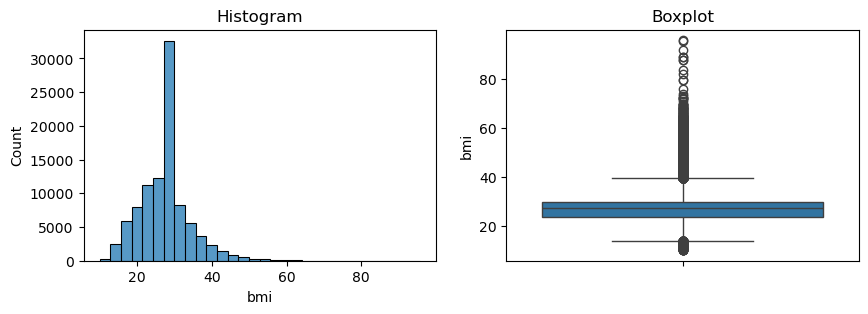

Skewness: 1.0237511657232292
Kurtosis: 3.271554032432832
HbA1c_level


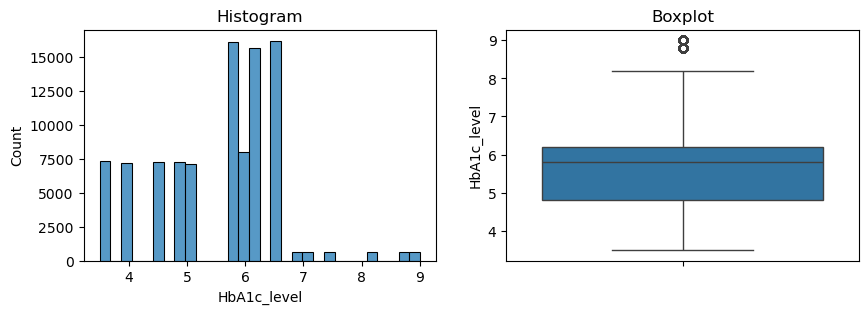

Skewness: -0.054463243946481645
Kurtosis: 0.23900685117797815
blood_glucose_level


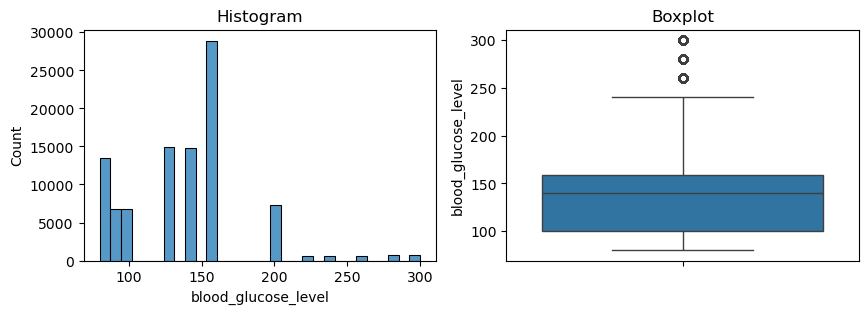

Skewness: 0.83648926055032
Kurtosis: 1.7584763418256188


In [11]:
# check boxplot and histogram function and also check the skewness and kurtosis
def check_distribution_outliers(df, columns):
    for col in columns:
        print(col)
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution_outliers(df_raw2[numerical_cols], numerical_cols)

From the plots and skewness values, we can see that columns HbA1c_level and age have a symmetric distribution because it have close to 0 skewness value and close to no outliers. On the other hand, columns bmi and blood_glucose_level have a right skewed distribution and few to many outliers. <br>

The kurtosis values shows that columns age, HbA1c_level, and blood_glucose_level hace a platykurtic distribution (data is more spread out) while the bmi columns has a mesokurtic or normal distribution.

### Encode, Identify and filling missing values

In [12]:
for i in categorical_cols:
    print(df_raw2[i].value_counts())

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64
hypertension
0    88685
1     7461
Name: count, dtype: int64
heart_disease
0    92223
1     3923
Name: count, dtype: int64


There are some inconsistency on values for the smoking_history column, so we are going to replace the values accordingly.

In [13]:
# replacing inconsistent values with uniform categories
df_raw2['smoking_history'] = df_raw2['smoking_history'].replace('No Info', np.nan)
df_raw2['smoking_history'] = df_raw2['smoking_history'].replace('never', 'Non Smoker')
df_raw2['smoking_history'] = df_raw2['smoking_history'].replace('former', 'Past Smoker')
df_raw2['smoking_history'] = df_raw2['smoking_history'].replace('not current', 'Past Smoker')
df_raw2['smoking_history'] = df_raw2['smoking_history'].replace('current', 'Ever Smoked')
df_raw2['smoking_history'] = df_raw2['smoking_history'].replace('ever', 'Ever Smoked')

In [14]:
# filters out rows from the df_raw2 DataFrame where the value in the gender column is 'Other'
df_raw2 = df_raw2[df_raw2['gender'] != 'Other']

In [15]:
# encode 'gender' column using label encoding method
df_raw2['gender'] = df_raw2['gender'].map({'Male': 0, 'Female': 1})

In [16]:
df_raw2['diabetes'].value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

In [17]:
# check missing value function
def check_na_count (df_raw):
    missing_values = df_raw.isna().sum()
    missing_percentage = (missing_values / df_raw.shape[0]) * 100

    for column in df_raw.columns:
        print(f"{column}\nMissing Values = {missing_values[column]}, Percentage = {missing_percentage[column]:.2f}%")

check_na_count(df_raw2)

gender
Missing Values = 0, Percentage = 0.00%
age
Missing Values = 0, Percentage = 0.00%
hypertension
Missing Values = 0, Percentage = 0.00%
heart_disease
Missing Values = 0, Percentage = 0.00%
smoking_history
Missing Values = 32881, Percentage = 34.21%
bmi
Missing Values = 0, Percentage = 0.00%
HbA1c_level
Missing Values = 0, Percentage = 0.00%
blood_glucose_level
Missing Values = 0, Percentage = 0.00%
diabetes
Missing Values = 0, Percentage = 0.00%


In [18]:
df_raw3 = df_raw2.copy()

In [19]:
# fills missing values in the smoking_history column  with the mode for that column, grouped by gender
df_raw3['smoking_history'] = df_raw3.groupby('gender')['smoking_history'].transform(
    lambda x: x.fillna(x.mode()[0])
)

In [20]:
check_na_count(df_raw3)

gender
Missing Values = 0, Percentage = 0.00%
age
Missing Values = 0, Percentage = 0.00%
hypertension
Missing Values = 0, Percentage = 0.00%
heart_disease
Missing Values = 0, Percentage = 0.00%
smoking_history
Missing Values = 0, Percentage = 0.00%
bmi
Missing Values = 0, Percentage = 0.00%
HbA1c_level
Missing Values = 0, Percentage = 0.00%
blood_glucose_level
Missing Values = 0, Percentage = 0.00%
diabetes
Missing Values = 0, Percentage = 0.00%


In [21]:
for i in categorical_cols:
    print(df_raw3[i].value_counts())

gender
1    56161
0    39967
Name: count, dtype: int64
smoking_history
Non Smoker     67276
Past Smoker    15658
Ever Smoked    13194
Name: count, dtype: int64
hypertension
0    88667
1     7461
Name: count, dtype: int64
heart_disease
0    92205
1     3923
Name: count, dtype: int64


After making the values on the smoking_history consistent, we are going to encode them using the one hot encoding method

In [22]:
# one hot encoding for smoking_history column
df_raw3 = pd.get_dummies(df_raw3, columns=['smoking_history'], drop_first=True).reset_index(drop=True)

In [23]:
df_raw3

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_Non Smoker,smoking_history_Past Smoker
0,1,80.0,0,1,25.19,6.6,140,0,True,False
1,1,54.0,0,0,27.32,6.6,80,0,True,False
2,0,28.0,0,0,27.32,5.7,158,0,True,False
3,1,36.0,0,0,23.45,5.0,155,0,False,False
4,0,76.0,1,1,20.14,4.8,155,0,False,False
...,...,...,...,...,...,...,...,...,...,...
96123,1,36.0,0,0,24.60,4.8,145,0,True,False
96124,1,2.0,0,0,17.37,6.5,100,0,True,False
96125,0,66.0,0,0,27.83,5.7,155,0,False,True
96126,1,24.0,0,0,35.42,4.0,100,0,True,False


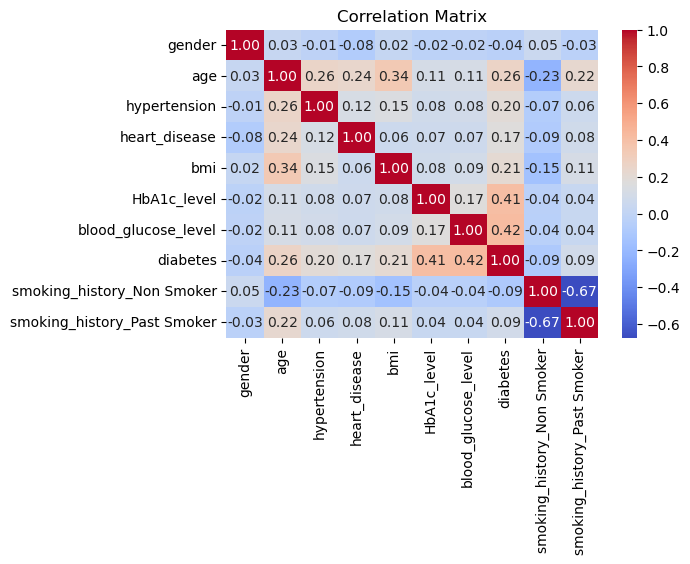

In [26]:
correlation_matrix = df_raw3.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

From the correlation matrix, we can see that the grayish color represent high correlation or strong linear relationship. The variables with that replationship are HbA1c_level and blood_glucose_level with 0.42, diabetes and blood_glucose_level with 0.42, and diabetes and HbA1c_level with 0.41 <br>

There are also variables that are not as highly correlated. These variables are age and bmi with 0.34, age and hypertension with 0.26, age and diabetes with 0.26, and bmi and diabetes with 0.21. <br>

Last, there are also variables with weak or even no relationships. Those variables are heart_disease and hypertension with 0.12, HbA1c_level and hypertension with 0.08, and gender with all variables with < 0.1.

### Scalling data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# apply StandardScaler to the numerical columns
sd_scaler = StandardScaler()
df_raw3[numerical_cols] = sd_scaler.fit_transform(df_raw3[numerical_cols])

In [29]:
df_raw3

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_Non Smoker,smoking_history_Past Smoker
0,1,1.700709,0,1,-0.314941,0.994547,0.043558,0,True,False
1,1,0.543261,0,0,-0.000214,0.994547,-1.423041,0,True,False
2,0,-0.614187,0,0,-0.000214,0.155949,0.483538,0,True,False
3,1,-0.258049,0,0,-0.572042,-0.496294,0.410208,0,False,False
4,0,1.522640,1,1,-1.061124,-0.682649,0.410208,0,False,False
...,...,...,...,...,...,...,...,...,...,...
96123,1,-0.258049,0,0,-0.402119,-0.682649,0.165775,0,True,False
96124,1,-1.771635,0,0,-1.470417,0.901370,-0.934175,0,True,False
96125,0,1.077468,0,0,0.075143,0.155949,0.410208,0,False,True
96126,1,-0.792256,0,0,1.196634,-1.428070,-0.934175,0,True,False


### Handling outliers



```
!pip install feature_engine
```



In [30]:
from scipy.stats.mstats import winsorize
from feature_engine.outliers import Winsorizer

iqr_winsor = Winsorizer(capping_method='iqr',
                        tail='both',
                        variables=numerical_cols,
                        missing_values='ignore')

df_raw4 = df_raw3.copy()
# df_raw4[numerical_cols] = iqr_winsor.fit_transform(df_raw4[numerical_cols])

We decided **not to handle the outliers** because they still make sense in the context of real cases. The extreme values represent rare but clinically significant conditions, and removing or altering them could dilute the important information needed for accurate diagnosis. These outliers may indicate severe cases that are crucial to detect, and handling them could result in the loss of valuable insights for the model.

## Splitting

In [31]:
df = df_raw4.copy()

In [32]:
X = df.drop('diabetes',axis=1) # features
y = df['diabetes'] # target

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, average_precision_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True, stratify=y)

In [35]:
y_train.value_counts()
y_test.value_counts()

diabetes
0    17530
1     1696
Name: count, dtype: int64

In [36]:
# distributing imbalance class
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=88)

## Oversampling

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # minority class will be 50% of the majority class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Fit to Machine Learning Model

### 1. K-Nearest Neighbors

#### Modelling

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [39]:
knn_balanced = KNeighborsClassifier(n_neighbors=20)
knn_balanced.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(n_neighbors=20)

#### Evaluation Before Hyperparameter Tuning

In [40]:
cv_score_knn = cross_val_score(knn, X_train, y_train, cv=kf, scoring="recall")
print(cv_score_knn)

[0.55784819 0.57437408 0.550479   0.57258659 0.56448047]


In [41]:
cv_score_knn_balanced = cross_val_score(knn_balanced, X_train_balanced, y_train_balanced, cv=kf, scoring="recall")
print(cv_score_knn_balanced)

[0.88888889 0.89018825 0.89275528 0.88747861 0.89516474]


#### Hyperparameter Tuning

In [42]:
params_knn = {
    "weights" : ['uniform', 'distance'],
    "n_neighbors": [ i for i in (3,20,3)]
}

In [43]:
grid_search_knn = GridSearchCV(knn, params_knn, scoring="recall")
grid_search_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'n_neighbors': [3, 20, 3],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [44]:
print(knn.get_params())
print(grid_search_knn.best_params_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'distance'}


In [45]:
grid_search_knn_balanced = GridSearchCV(knn_balanced, params_knn, scoring="recall")
grid_search_knn_balanced.fit(X_train_balanced, y_train_balanced)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'n_neighbors': [3, 20, 3],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [46]:
print(knn_balanced.get_params())
print(grid_search_knn_balanced.best_params_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
{'n_neighbors': 3, 'weights': 'distance'}


In [47]:
knn2 = grid_search_knn.best_estimator_
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [48]:
knn2_balanced = grid_search_knn_balanced.best_estimator_
knn2_balanced.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier(n_neighbors=3, weights='distance')

#### Evaluation After Hyperparameter Tuning

In [49]:
cv_score_knn2 = cross_val_score(knn, X_train, y_train, cv=kf, scoring="recall")
print(cv_score_knn2)

[0.55784819 0.57437408 0.550479   0.57258659 0.56448047]


In [50]:
cv_score_knn2_balanced = cross_val_score(knn2_balanced, X_train_balanced, y_train_balanced, cv=kf, scoring="recall")
print(cv_score_knn2_balanced)

[0.96006276 0.95750143 0.95764404 0.95407872 0.96334332]


#### Classification Report

In [51]:
y_pred_knn = knn2.predict(X_test)
print(classification_report(y_test, y_pred_knn, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17530
           1       0.79      0.67      0.73      1696

    accuracy                           0.96     19226
   macro avg       0.88      0.83      0.85     19226
weighted avg       0.95      0.96      0.95     19226



In [52]:
y_pred_knn_balanced = knn2_balanced.predict(X_test)
print(classification_report(y_test, y_pred_knn_balanced, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     17530
           1       0.59      0.76      0.66      1696

    accuracy                           0.93     19226
   macro avg       0.78      0.86      0.81     19226
weighted avg       0.94      0.93      0.94     19226



For diabetes diagnosis, model "knn2_balanced" is the better choice when considering recall and F1-score together. It has a higher recall of 0.76, ensuring more diabetic patients are identified. Although the F1-score drops slightly, it still maintains a reasonable balance between precision and recall. Therefore, balancing recall with F1-score leads to a model that effectively identifies true positives while minimizing false negatives.

"knn2_balanced" is a K-Nearest Neighbors model optimized with GridSearch on a balanced dataset using oversampling, with hyperparameters {'n_neighbors': 3, 'weights': 'distance'}

### 2. Random Forest

#### Modelling

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=3, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [54]:
rf_model_balanced = RandomForestClassifier(n_estimators=3, random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(n_estimators=3, random_state=42)

#### Evaluation Before Hyperparameter Tuning

In [55]:
cv_score_rf = cross_val_score(rf_model, X_train, y_train, cv = kf, scoring='recall')
cv_score_rf

array([0.71333825, 0.73195876, 0.69565217, 0.71260133, 0.72144436])

In [56]:
cv_score_rf_balanced = cross_val_score(rf_model_balanced, X_train_balanced, y_train_balanced, cv = kf, scoring='recall')
cv_score_rf_balanced

array([0.92896876, 0.92555619, 0.9256988 , 0.92441529, 0.92996719])

#### Hyperparameter Tuning

In [57]:
params_rf = {
    "max_features": ["sqrt", "log2", None],
    "criterion": ['gini', 'entropy'],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [58]:
grid_search_rf = GridSearchCV(rf_model, params_rf, scoring="recall")
grid_search_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=3, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [59]:
print(rf_model.get_params())
print(grid_search_rf.best_params_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 3, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [60]:
rf2 = grid_search_rf.best_estimator_
rf2.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=3, random_state=42)

In [61]:
grid_search_rf_balanced = GridSearchCV(rf_model_balanced, params_rf, scoring="recall")
grid_search_rf_balanced.fit(X_train_balanced, y_train_balanced)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=3, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [62]:
print(rf_model_balanced.get_params())
print(grid_search_rf_balanced.best_params_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 3, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [63]:
rf2_balanced = grid_search_rf_balanced.best_estimator_
rf2_balanced.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(criterion='entropy', n_estimators=3, random_state=42)

#### Evaluation After Hyperparameter Tuning

In [64]:
cv_score_rf2 = cross_val_score(rf2, X_train, y_train, cv = kf, scoring='recall')
cv_score_rf2

array([0.71039057, 0.73637703, 0.70523213, 0.7229182 , 0.73470892])

In [65]:
cv_score_rf2_balanced = cross_val_score(rf2_balanced, X_train_balanced, y_train_balanced, cv = kf, scoring='recall')
cv_score_rf2_balanced

array([0.92711453, 0.92170565, 0.92612664, 0.92256132, 0.9278277 ])

#### Classification Report

In [66]:
print(classification_report(y_test, rf_model.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17530
           1       0.83      0.73      0.78      1696

    accuracy                           0.96     19226
   macro avg       0.90      0.86      0.88     19226
weighted avg       0.96      0.96      0.96     19226



In [67]:
print(classification_report(y_test, rf_model_balanced.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17530
           1       0.73      0.75      0.74      1696

    accuracy                           0.95     19226
   macro avg       0.85      0.86      0.86     19226
weighted avg       0.95      0.95      0.95     19226



In [68]:
print(classification_report(y_test, rf2.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17530
           1       0.80      0.73      0.76      1696

    accuracy                           0.96     19226
   macro avg       0.89      0.86      0.87     19226
weighted avg       0.96      0.96      0.96     19226



In [69]:
print(classification_report(y_test, rf2_balanced.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17530
           1       0.73      0.76      0.74      1696

    accuracy                           0.95     19226
   macro avg       0.85      0.87      0.86     19226
weighted avg       0.95      0.95      0.95     19226



Model "rf2_balanced" is the best choice for diabetes diagnosis, despite its slightly lower F1-score (0.86) compared to rf_model (0.88), due to its highest recall (0.76) among all the models. In medical diagnosis, recall is a critical metric as it helps minimize false negatives, ensuring that fewer diabetic patients are overlooked. 

"rf2_balanced"  is a Random Forest model optimized using GridSearch on a balanced dataset through oversampling. The hyperparameters for this model are {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

## Evaluation for both model

### Confusion Matrix for Both Models

In [70]:
cm_knn = confusion_matrix(y_test,knn2_balanced.predict(X_test),labels = [0,1])
cm_rf = confusion_matrix(y_test,rf2_balanced.predict(X_test),labels = [0,1])
print("KNN\n", cm_knn)
print("Random Forest\n", cm_rf)

KNN
 [[16623   907]
 [  400  1296]]
Random Forest
 [[17053   477]
 [  410  1286]]


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

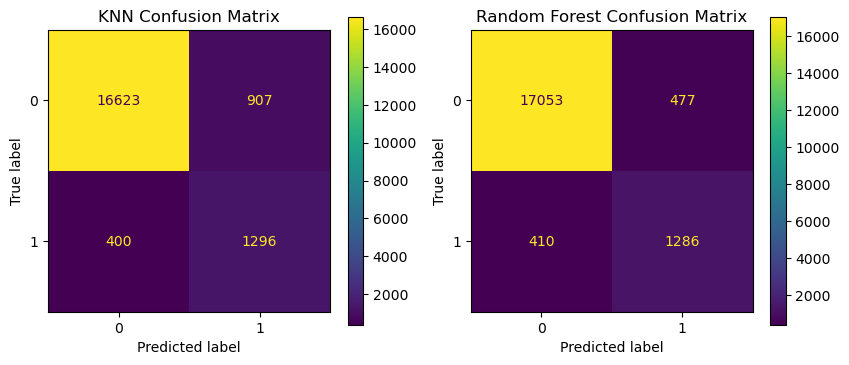

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

cm_knn_plot = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['0', '1'])
cm_knn_plot.plot(ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')

cm_rf_plot = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['0', '1'])
cm_rf_plot.plot(ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')

### AUC-ROC Curve

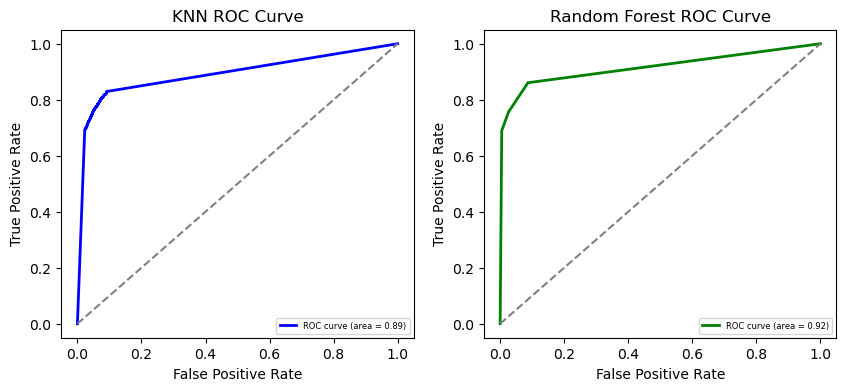

In [72]:
y_pred_proba_knn = knn2_balanced.predict_proba(X_test)
y_pred_proba_rf = rf2_balanced.predict_proba(X_test)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn[:, 1])
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn[:, 1])

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf[:, 1])
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(fpr_knn, tpr_knn, label="ROC curve (area = {0:0.2f})".format(roc_auc_knn), color="blue", linewidth=2)
axes[0].plot([0, 1], [0, 1], color="gray", linestyle="--")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title('KNN ROC Curve')
axes[0].legend(loc="lower right", prop={'size': 6})

axes[1].plot(fpr_rf, tpr_rf, label="ROC curve (area = {0:0.2f})".format(roc_auc_rf), color="green", linewidth=2)
axes[1].plot([0, 1], [0, 1], color="gray", linestyle="--")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title('Random Forest ROC Curve')
axes[1].legend(loc="lower right", prop={'size': 6})

The KNN model shows good performance based on the AUC value (0.89) and by the shape of the ROC curve that is bending to the top-left (indicating good balance between True Positive Rate and False Positive Rate).<br>

The Random Forest shows better performance based on the higher AUC value (0.92) and better ROC curve shape. <br>

So, based on the ROC Curve, the model that shows better performance is the Random Forest model because it has a higher accuracy (based on the AUC value) and better balance.

### Model Metrics Comparison

In [73]:
# Input: takes three inputs: y_test, the true labels of the test dataset; y_preds, the predicted labels from the model; and an optional y_preds_proba, the predicted probabilities for the positive class
# Process: calculates classification metrics including accuracy, recall, precision, and F1 score from y_test and y_preds, and optionally computes the AUC score if y_preds_proba is provided and valid
# Output: returns a pandas DataFrame containing the calculated metrics, with columns for accuracy, recall, precision, F1 score, and optionally AUC

def calc_class_metrics(y_test,y_preds,y_preds_proba=None):
    res_dict = {}
    res_dict['accuracy'] = accuracy_score(y_test,y_preds)
    res_dict['recall'] = recall_score(y_test,y_preds)
    res_dict['precision'] = precision_score(y_test,y_preds)
    res_dict['f1_score'] = f1_score(y_test,y_preds)

    if len(y_preds_proba)>0:
        res_dict['auc'] = roc_auc_score(y_test,y_preds_proba)
    return pd.DataFrame([res_dict])

In [74]:
print("KNN\n", calc_class_metrics(y_test,knn2_balanced.predict(X_test),knn2_balanced.predict_proba(X_test)[:, 1]))
print("Random Forest\n", calc_class_metrics(y_test,rf2_balanced.predict(X_test),rf2_balanced.predict_proba(X_test)[:, 1]))

KNN
    accuracy    recall  precision  f1_score       auc
0  0.932019  0.764151   0.588289  0.664786  0.891615
Random Forest
    accuracy    recall  precision  f1_score       auc
0  0.953865  0.758255   0.729438  0.743568  0.915629


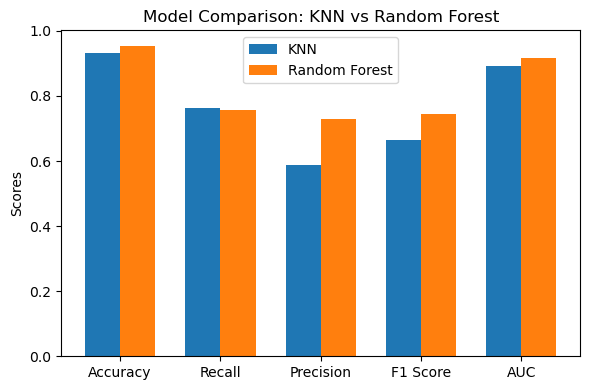

In [75]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC']
knn_scores = [0.932019, 0.764151, 0.588289, 0.664786, 0.891615]
rf_scores = [0.953865, 0.758255, 0.729438, 0.743568, 0.915629]

# number of metrics
n_metrics = len(metrics)

x = np.arange(n_metrics)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# bars for KNN and Random Forest for each metric
ax.bar(x - width/2, knn_scores, width, label='KNN')
ax.bar(x + width/2, rf_scores, width, label='Random Forest')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison: KNN vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

1. Accuracy: Random Forest (0.954) vs KNN (0.932)
   - Random Forest is about 2.2% more accurate in overall predictions.

2. Precision: Random Forest (0.729) vs KNN (0.588)
   - Random Forest significantly outperforms KNN in reducing false positives, making it more reliable for predicting positive cases.

3. F1-Score: Random Forest (0.744) vs KNN (0.665)
   - Random Forest achieves a better balance between precision and recall, which is crucial for minimizing both false positives and false negatives in medical diagnoses.

4. Recall: Both models are quite similar.
   - KNN (0.764) vs Random Forest (0.758)
   - KNN slightly performs better at identifying true positive cases, but the difference is marginal.

5. AUC: Random Forest (0.916) vs KNN (0.892)
   - Random Forest shows slightly better classification performance and discriminates better between the classes.

The Random Forest model is better for diabetes diagnosis. It provides a higher F1-score (0.744) and slightly better AUC (0.916), while maintaining a recall score (0.758) close to that of KNN. This makes it a more reliable choice for minimizing both false negatives and false positives, ensuring a better overall diagnostic performance.

### Feature Importance for The Best Model (Random Forest Model)

In [76]:
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf2_balanced.feature_importances_
})

feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_rf.head()

,Feature,Importance
0,HbA1c_level,0.361793
1,blood_glucose_level,0.327072
2,age,0.164803
3,bmi,0.102100
4,hypertension,0.019910


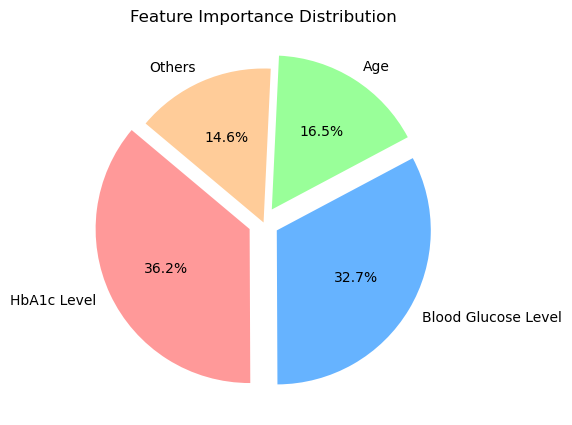

In [77]:
features = ['HbA1c Level', 'Blood Glucose Level', 'Age', 'Others']
importance = [0.361793, 0.327072, 0.164803, 1 - (0.361793 + 0.327072 + 0.164803)]


plt.figure(figsize=(5, 5))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0.1, 0.1, 0)  # slightly explode the first three slices
plt.pie(importance, labels=features, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Feature Importance Distribution')
plt.show()

1. HbA1c_level: The most influential feature (0.362 or ~36% importance)
   - HbA1c is a critical marker that reflects the average blood sugar levels over the past 2-3 months.
   - It is commonly used in diagnosing and monitoring diabetes, making it a key predictor in the model.

2. blood_glucose_level: The second most important feature (0.327 or ~33%)
   - This feature measures the immediate level of glucose in the blood and is central to diabetes diagnosis.
   - Combined with HbA1c, these two blood-related measurements contribute significantly to the model’s ability to predict diabetes, which mirrors standard clinical practices.

3. age: The third most important feature (0.165 or ~16%)
   - Age is an important factor in diabetes risk, with older individuals generally having a higher risk of developing diabetes.
   - This aligns with clinical understanding, where age is a contributing risk factor for diabetes.